<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-Required-Packages" data-toc-modified-id="Import-Required-Packages-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import Required Packages</a></span></li><li><span><a href="#Import-Data-Scource" data-toc-modified-id="Import-Data-Scource-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import Data Scource</a></span></li><li><span><a href="#Data-Preparation" data-toc-modified-id="Data-Preparation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Model-and-Parameters-Selection" data-toc-modified-id="Model-and-Parameters-Selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model and Parameters Selection</a></span></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Model Evaluation</a></span></li></ul></div>

# Import Required Packages

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,recall_score
from sklearn import metrics 
from sklearn.metrics import classification_report, confusion_matrix  
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
#import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from mlxtend.plotting import plot_confusion_matrix


warnings.filterwarnings('ignore')
%matplotlib inline

/Users/jiahao/anaconda3/envs/CA1/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


# Import Data Scource

In [2]:
data = pd.read_csv('../input/application_train.csv')

# Data Preparation

Overall Dataset Summary

In [3]:
#check basic dataframe information
print("Data Dimensions:  ", data.shape)

sumry = data.describe().transpose()
print("Summary Statistics:\n",sumry,'\n')

Data Dimensions:   (307511, 122)
Summary Statistics:
                                count           mean            std       min  \
SK_ID_CURR                  307511.0  278180.518577  102790.175348  100002.0   
TARGET                      307511.0       0.080729       0.272419       0.0   
CNT_CHILDREN                307511.0       0.417052       0.722121       0.0   
AMT_INCOME_TOTAL            307511.0  168797.919297  237123.146279   25650.0   
AMT_CREDIT                  307511.0  599025.999706  402490.776996   45000.0   
...                              ...            ...            ...       ...   
AMT_REQ_CREDIT_BUREAU_DAY   265992.0       0.007000       0.110757       0.0   
AMT_REQ_CREDIT_BUREAU_WEEK  265992.0       0.034362       0.204685       0.0   
AMT_REQ_CREDIT_BUREAU_MON   265992.0       0.267395       0.916002       0.0   
AMT_REQ_CREDIT_BUREAU_QRT   265992.0       0.265474       0.794056       0.0   
AMT_REQ_CREDIT_BUREAU_YEAR  265992.0       1.899974       1.869295

In [4]:
missing_value = data.isnull().sum()
missing_value_col_count=(missing_value!=0).value_counts().loc[True]
print("There are " + str(missing_value_col_count) + 
      " columns that have missing values over "+
     str(data.shape[1]) + " total columns.")

There are 67 columns that have missing values over 122 total columns.


Handle Missing Value

In [5]:
#check missing values in the dataframe
missing_value = data.isnull().sum()
missing_value_percent = 100 * data.isnull().sum()/len(data)

missing_value_table = pd.concat([missing_value, missing_value_percent], axis = 1).rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})

missing_value_table = missing_value_table[missing_value_table.iloc[:,1] != 0].sort_values('% of Total Values', ascending=False).round(1)

missing_value_table

,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
...,...,...
EXT_SOURCE_2,660,0.2
AMT_GOODS_PRICE,278,0.1
AMT_ANNUITY,12,0.0
CNT_FAM_MEMBERS,2,0.0


In [6]:
# Option 1
#drop columns that missing values are above 30% of the original dataset 
data = data.drop(['OCCUPATION_TYPE','EXT_SOURCE_1','OWN_CAR_AGE','COMMONAREA_MEDI','COMMONAREA_AVG','COMMONAREA_MODE','NONLIVINGAPARTMENTS_MEDI','NONLIVINGAPARTMENTS_MODE','NONLIVINGAPARTMENTS_AVG','FONDKAPREMONT_MODE','LIVINGAPARTMENTS_MODE','LIVINGAPARTMENTS_MEDI','LIVINGAPARTMENTS_AVG','FLOORSMIN_MODE','FLOORSMIN_MEDI','FLOORSMIN_AVG','YEARS_BUILD_MODE','YEARS_BUILD_MEDI','YEARS_BUILD_AVG','LANDAREA_AVG','LANDAREA_MEDI','LANDAREA_MODE','BASEMENTAREA_MEDI','BASEMENTAREA_AVG','BASEMENTAREA_MODE','NONLIVINGAREA_MEDI','NONLIVINGAREA_MODE','NONLIVINGAREA_AVG','ELEVATORS_MEDI','ELEVATORS_MODE','ELEVATORS_AVG','WALLSMATERIAL_MODE','APARTMENTS_MODE','APARTMENTS_MEDI','APARTMENTS_AVG','ENTRANCES_MODE','ENTRANCES_AVG','ENTRANCES_MEDI','LIVINGAREA_MEDI','LIVINGAREA_MODE','LIVINGAREA_AVG','HOUSETYPE_MODE','FLOORSMAX_MEDI','FLOORSMAX_AVG','FLOORSMAX_MODE','YEARS_BEGINEXPLUATATION_AVG','YEARS_BEGINEXPLUATATION_MEDI','YEARS_BEGINEXPLUATATION_MODE','TOTALAREA_MODE','EMERGENCYSTATE_MODE'],axis=1)

In [7]:
# # Option 2
# # Set up threshold
# threshold = 0.7
# # Drop columns with missing values over thresh
# data.dropna(thresh=len(data) * threshold, axis=1, inplace=True)
# # Drop ID column
# data.drop(['SK_ID_CURR'], axis=1, inplace=True)

In [8]:
# replace the missing value with the average of column
# for those that missing value is above 10%
data['EXT_SOURCE_3'].fillna(
    data['EXT_SOURCE_3'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_YEAR'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_QRT'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_MON'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_WEEK'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_DAY'].mean(), inplace=True)
data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(
    data['AMT_REQ_CREDIT_BUREAU_HOUR'].mean(), inplace=True)

In [9]:
#drop rows that contain missing value for those columns have missing value less than 10%
data = data.dropna()
data.shape

(304531, 72)

Convert Categorical Data

In [10]:
#check columns type
data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             5
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [11]:
data['CODE_GENDER'].value_counts()

F      200482
M      104045
XNA         4
Name: CODE_GENDER, dtype: int64

In [12]:
#drop column values that do not make sense based on domain knowledge
data = data[data.CODE_GENDER != 'XNA']
data.shape

(304527, 72)

In [13]:
data['ORGANIZATION_TYPE'].value_counts()
len(data[data.ORGANIZATION_TYPE == 'XNA'])/len(data)

data = data[data.ORGANIZATION_TYPE != 'XNA']
data.shape

(249675, 72)

In [14]:
# Option 1
# convert all categorical data into numercial by using one hot encode
coln = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE','WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
dummy = pd.get_dummies(data, columns = coln)

In [15]:
# # convert binary categorical data
# for bin_feature in ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']:
#     data[bin_feature], uniques = pd.factorize(data[bin_feature])

In [16]:
# # convert rest categorical data into numercial by using one hot encode
# coln = ['NAME_CONTRACT_TYPE',
#         'NAME_TYPE_SUITE',
#         'NAME_INCOME_TYPE', 
#         'NAME_EDUCATION_TYPE', 
#         'NAME_FAMILY_STATUS', 
#         'NAME_HOUSING_TYPE',
#         'WEEKDAY_APPR_PROCESS_START', 
#         'ORGANIZATION_TYPE']
# dummy = pd.get_dummies(data, columns = coln)

Variable Distribution with Target

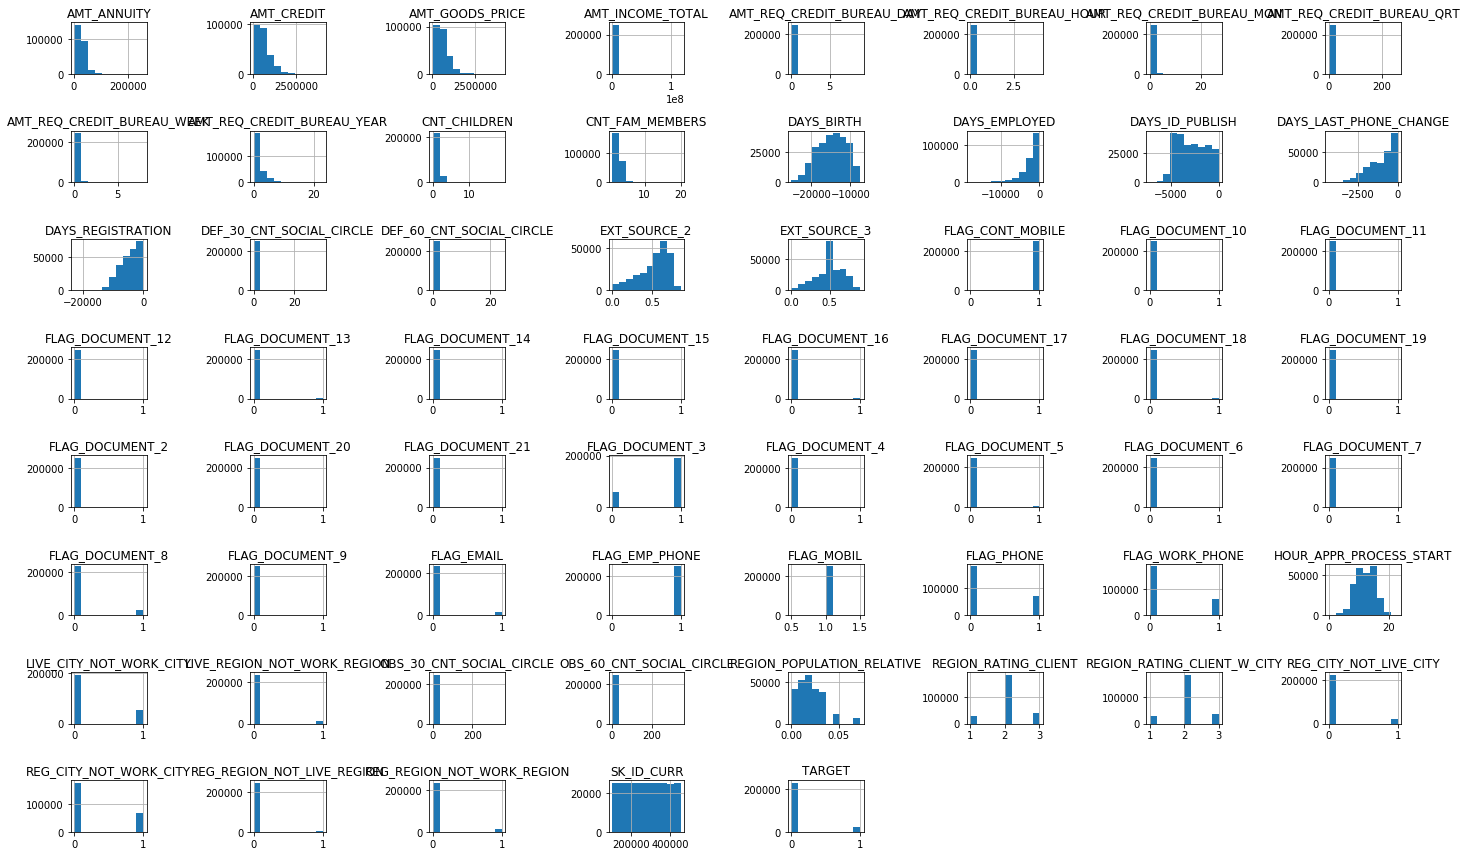

In [17]:
data.hist(grid=True, figsize=(20,12))
plt.tight_layout()
plt.savefig('variable_distribution.png')
plt.show()

In [18]:
#check target value distribution
data['TARGET'].value_counts()

0    227975
1     21700
Name: TARGET, dtype: int64

In [19]:
#Compare the distribution of targe value and those variables, we can see that the distribution of feature does not look
#the distribution shape of the targe. And options are not well distrbuited within the feature. So we can mark those
#feature as fix value to remove from the dataset.

data['FLAG_DOCUMENT_2'].value_counts()
data['FLAG_DOCUMENT_4'].value_counts()
data['FLAG_DOCUMENT_7'].value_counts()
data['FLAG_DOCUMENT_9'].value_counts()
data['FLAG_DOCUMENT_10'].value_counts()
data['FLAG_DOCUMENT_11'].value_counts()
data['FLAG_DOCUMENT_12'].value_counts()
data['FLAG_DOCUMENT_13'].value_counts()
data['FLAG_DOCUMENT_14'].value_counts()
data['FLAG_DOCUMENT_15'].value_counts()
data['FLAG_DOCUMENT_16'].value_counts()
data['FLAG_DOCUMENT_17'].value_counts()
data['FLAG_DOCUMENT_18'].value_counts()
data['FLAG_DOCUMENT_19'].value_counts()
data['FLAG_DOCUMENT_20'].value_counts()
data['FLAG_DOCUMENT_21'].value_counts()
data['FLAG_DOCUMENT_21'].value_counts()

dummy = dummy.drop(['FLAG_DOCUMENT_2','FLAG_DOCUMENT_7','FLAG_DOCUMENT_4','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10','FLAG_DOCUMENT_11','FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13','FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21'],axis=1)

Log Transformation

In [20]:
#log skewed numercial data columns
dummy['AMT_INCOME_TOTAL'] = np.log(dummy['AMT_INCOME_TOTAL'])
dummy['AMT_CREDIT'] = np.log(dummy['AMT_CREDIT'])
dummy['AMT_ANNUITY'] = np.log(dummy['AMT_ANNUITY'])
dummy['AMT_GOODS_PRICE'] = np.log(dummy['AMT_GOODS_PRICE'])

In [21]:
dummy['DAYS_BIRTH'] = np.log(dummy['DAYS_BIRTH'].abs()/365)

In [22]:
dummy['DAYS_EMPLOYED'] = dummy['DAYS_EMPLOYED'].replace(0, 0.01)
dummy['DAYS_EMPLOYED'] = np.log(dummy['DAYS_EMPLOYED'].abs()/365)

In [23]:
dummy['DAYS_REGISTRATION'] = dummy['DAYS_REGISTRATION'].replace(0, 0.01)
dummy['DAYS_REGISTRATION'] = np.log(dummy['DAYS_REGISTRATION'].abs()/365)

In [24]:
dummy['DAYS_ID_PUBLISH'] = dummy['DAYS_ID_PUBLISH'].replace(0, 0.01)
dummy['DAYS_ID_PUBLISH'] = np.log(dummy['DAYS_ID_PUBLISH'].abs()/365)

In [25]:
dummy['DAYS_LAST_PHONE_CHANGE'] = dummy['DAYS_LAST_PHONE_CHANGE'].replace(0, 0.01)
dummy['DAYS_LAST_PHONE_CHANGE'] = np.log(dummy['DAYS_LAST_PHONE_CHANGE'].abs()/365)

In [26]:
dummy['AMT_REQ_CREDIT_BUREAU_YEAR'] = dummy['AMT_REQ_CREDIT_BUREAU_YEAR'].replace(0, 0.01)
dummy['AMT_REQ_CREDIT_BUREAU_YEAR'] = np.log(dummy['AMT_REQ_CREDIT_BUREAU_YEAR'])

In [27]:
dummy['OBS_30_CNT_SOCIAL_CIRCLE'] = dummy['OBS_30_CNT_SOCIAL_CIRCLE'].replace(0, 0.01)
dummy['OBS_30_CNT_SOCIAL_CIRCLE'] = np.log(dummy['OBS_30_CNT_SOCIAL_CIRCLE'])

Reset Index and Prepare dataset for spliting

In [28]:
dummy = dummy.reset_index()
dummy.shape

(249675, 148)

In [29]:
del dummy['SK_ID_CURR']
del dummy['index']

target = dummy['TARGET']
del dummy['TARGET']

In [30]:
dummy.shape

(249675, 145)

In [31]:
dummy.head(1)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,12.218495,12.915579,10.114579,12.768542,0.018801,3.255036,0.556872,2.302037,1.759274,...,0,0,0,0,0,0,0,0,0,0


Split Prepared Dataset into Training and Testing 

In [32]:
X_train,X_test,y_train,y_test = train_test_split(dummy, target, test_size=0.25, random_state=42, stratify=target)

In [33]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (187256, 145)
Number transactions y_train dataset:  (187256,)
Number transactions X_test dataset:  (62419, 145)
Number transactions y_test dataset:  (62419,)


Resample Training Dataset to Avoid Imbalanced Issue

In [34]:
rus = RandomUnderSampler()
X_train_resample, y_train_resample = rus.fit_resample(X_train, y_train)

# Feature Selection

In [35]:
#apply feature engining by using decision tree as matrics
columns = pd.DataFrame(X_train.columns)

estimator = DecisionTreeClassifier()
selector = RFE(estimator, 15, step=1)
selector = selector.fit(X_train_resample, y_train_resample)

ranking = pd.DataFrame(selector.ranking_)

In [36]:
featureScores = pd.concat([columns,ranking],axis=1)
featureScores.columns = ['Features','Score']  #naming the dataframe columns
featureScores[featureScores.Score == 1]

,Features,Score
1,AMT_INCOME_TOTAL,1
2,AMT_CREDIT,1
3,AMT_ANNUITY,1
4,AMT_GOODS_PRICE,1
5,REGION_POPULATION_RELATIVE,1
6,DAYS_BIRTH,1
7,DAYS_EMPLOYED,1
8,DAYS_REGISTRATION,1
9,DAYS_ID_PUBLISH,1
19,HOUR_APPR_PROCESS_START,1


In [37]:
X_train_resample_fs = pd.DataFrame(X_train_resample, columns=X_train.columns)

In [38]:
X_train_resample_fs = X_train_resample_fs[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                     'DAYS_EMPLOYED','DAYS_REGISTRATION','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
                                     'DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']]

In [39]:
X_train_resample_fs = X_train_resample_fs.values

In [40]:
X_test_fs = X_test[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                     'DAYS_EMPLOYED','DAYS_REGISTRATION','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
                                     'DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']]

# Model and Parameters Selection

Logistic Regression with Grid Search for Feature Selected Training Data

In [41]:
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train_resample_fs, y_train_resample)

log_reg = grid_log_reg.best_estimator_

In [42]:
log_reg

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Recall metric in the testing dataset:  0.640184331797235


<Figure size 432x288 with 0 Axes>

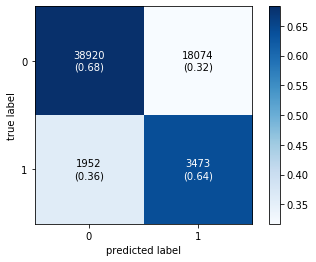

In [43]:
#test with original testing dataset
log_reg.fit(X_train_resample_fs, y_train_resample)

y_pred = log_reg.predict(X_test_fs)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
# plot_confusion_matrix(cnf_matrix
#                       , classes=class_names
#                       , title='Confusion matrix')
# plt.savefig('test_1.png', dpi=300)
# plt.show()

fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_log_reg_matrix', dpi=300)
plt.show()

In [44]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.68      0.80     56994
           1       0.16      0.64      0.26      5425

    accuracy                           0.68     62419
   macro avg       0.56      0.66      0.53     62419
weighted avg       0.88      0.68      0.75     62419



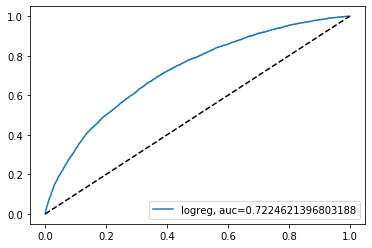

In [45]:
#ROC
y_pred_proba = log_reg.predict_proba(X_test_fs)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_log_reg_roc', dpi=300)
plt.show()

KNN with Grid Search for Feature Selected Training Data

In [46]:
knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train_resample_fs, y_train_resample)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

In [47]:
knears_neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

Recall metric in the testing dataset:  0.3942857142857143


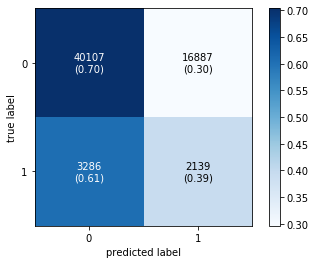

In [48]:
#test with original testing dataset
knears_neighbors.fit(X_train_resample_fs, y_train_resample)

y_pred = knears_neighbors.predict(X_test_fs)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
# plt.figure()
# plot_confusion_matrix(cnf_matrix
#                       , classes=class_names
#                       , title='Confusion matrix')
# plt.show()
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_knn_matrix', dpi=300)
plt.show()

In [49]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.70      0.80     56994
           1       0.11      0.39      0.17      5425

    accuracy                           0.68     62419
   macro avg       0.52      0.55      0.49     62419
weighted avg       0.85      0.68      0.74     62419



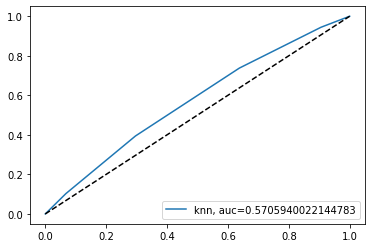

In [50]:
#ROC
y_pred_proba = knears_neighbors.predict_proba(X_test_fs)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="knn, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_knn_roc', dpi=300)
plt.show()

Random Forest with Grid Search for Feature Selected Training Data

In [51]:
param_grid = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train_resample_fs, y_train_resample)

rfc = CV_rfc.best_params_

In [52]:
rfc

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [53]:
rfc = RandomForestClassifier(n_estimators=200, max_depth=8, max_features='auto', criterion='entropy')

Recall metric in the testing dataset:  0.6610138248847927


<Figure size 432x288 with 0 Axes>

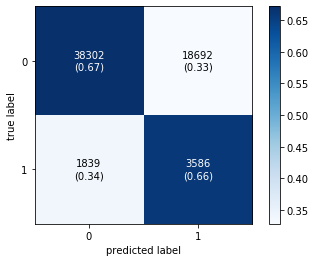

In [54]:
#test with original testing dataset
rfc.fit(X_train_resample_fs, y_train_resample)

y_pred = rfc.predict(X_test_fs)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_rfc_matrix', dpi=300)
plt.show()

In [55]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.95      0.67      0.79     56994
           1       0.16      0.66      0.26      5425

    accuracy                           0.67     62419
   macro avg       0.56      0.67      0.52     62419
weighted avg       0.89      0.67      0.74     62419



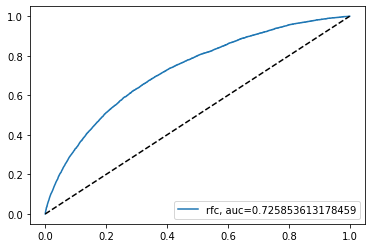

In [56]:
#ROC
y_pred_proba = rfc.predict_proba(X_test_fs)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="rfc, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_rfc_roc', dpi=300)
plt.show()

ADABOOST with Grid Search for All Training Data

In [57]:
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'algorithm' : ['SAMME','SAMME.R']
}

pre_gs_inst = GridSearchCV(AdaBoostClassifier(), param_dist, cv=5)
pre_gs_inst.fit(X_train_resample, y_train_resample)

adb = pre_gs_inst.best_params_

In [58]:
adb

{'algorithm': 'SAMME.R', 'learning_rate': 1, 'n_estimators': 100}

In [59]:
adb = AdaBoostClassifier(algorithm='SAMME.R', learning_rate=0.3, n_estimators=100)

Recall metric in the testing dataset:  0.6670967741935484


<Figure size 432x288 with 0 Axes>

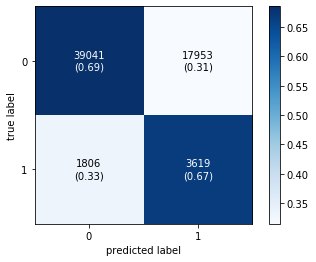

In [60]:
#test with original testing dataset
adb.fit(X_train_resample, y_train_resample)

y_pred = adb.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_adb_matrix', dpi=300)
plt.show()


In [61]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.69      0.80     56994
           1       0.17      0.67      0.27      5425

    accuracy                           0.68     62419
   macro avg       0.56      0.68      0.53     62419
weighted avg       0.89      0.68      0.75     62419



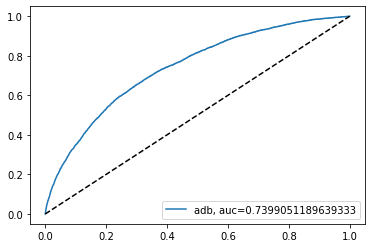

In [62]:
#ROC
y_pred_proba = adb.predict_proba(X_test.values)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="adb, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_adb_roc', dpi=300)
plt.show()

XGBOOST with Grid Search for All Training Data

In [63]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.15], #so called `eta` value
              'max_depth': [8],
              'min_child_weight': [3,11],
              'silent': [1],
              'subsample': [0.9],
              'colsample_bytree': [0.5],
              'n_estimators': [300], #number of trees
              'seed': [1337]}

clf = GridSearchCV(XGBClassifier(), parameters, n_jobs=4, verbose=2, refit=True)

clf.fit(X_train_resample, y_train_resample)

xgb = clf.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   6 | elapsed:   53.4s remaining:   53.4s
[Parallel(n_jobs=4)]: Done   6 out of   6 | elapsed:  1.3min finished


In [64]:
xgb

{'colsample_bytree': 0.5,
 'learning_rate': 0.15,
 'max_depth': 8,
 'min_child_weight': 11,
 'n_estimators': 300,
 'nthread': 4,
 'objective': 'binary:logistic',
 'seed': 1337,
 'silent': 1,
 'subsample': 0.9}

In [65]:
xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Recall metric in the testing dataset:  0.6772350230414746


<Figure size 432x288 with 0 Axes>

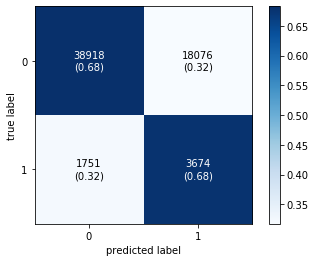

In [66]:
#test with original testing dataset
xgb.fit(X_train_resample, y_train_resample)

y_pred = xgb.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_xgb_matrix', dpi=300)
plt.show()


In [67]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56994
           1       0.17      0.68      0.27      5425

    accuracy                           0.68     62419
   macro avg       0.56      0.68      0.53     62419
weighted avg       0.89      0.68      0.75     62419



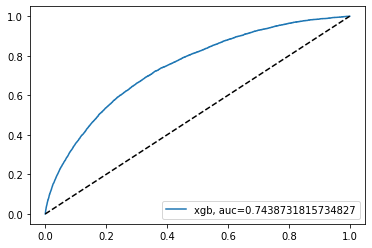

In [68]:
#ROC
y_pred_proba = xgb.predict_proba(X_test.values)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="xgb, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_xgb_roc', dpi=300)
plt.show()

LIGHTGBM with Random Search for All Training Data

In [69]:
gridParams = {
    'learning_rate': [0.005],
    'n_estimators': [40],
    'num_leaves': [6,8,12,16],
    'boosting_type' : ['gbdt'],
    'objective' : ['binary'],
    'random_state' : [501], # Updated from 'seed'
    'colsample_bytree' : [0.65, 0.66],
    'subsample' : [0.7,0.75],
    'reg_alpha' : [1,1.2],
    'reg_lambda' : [1,1.2,1.4],
    }

lgb = LGBMClassifier(boosting_type= 'gbdt',
          objective = 'binary',
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = -1,
          max_bin = 512,
          subsample_for_bin = 200,
          subsample = 1,
          subsample_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          scale_pos_weight = 1)

clf = GridSearchCV(lgb, gridParams,
                    verbose=0,
                    cv=4,
                    n_jobs=2)

clf.fit(X_train_resample, y_train_resample)

clf.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.66,
 'learning_rate': 0.005,
 'n_estimators': 40,
 'num_leaves': 16,
 'objective': 'binary',
 'random_state': 501,
 'reg_alpha': 1,
 'reg_lambda': 1,
 'subsample': 0.75}

In [70]:
lgb = LGBMClassifier(boosting_type= 'gbdt',
                     colsample_bytree= 0.65,
                     learning_rate= 0.005,
                     n_estimators= 40,
                     num_leaves= 16,
                     objective= 'binary',
                     random_state= 501,
                     reg_alpha= 1.2,
                     reg_lambda= 1,
                     subsample= 0.7,
          n_jobs = 3, # Updated from 'nthread'
          silent = True,
          max_depth = -1,
          max_bin = 512,
          subsample_for_bin = 200,
          subsample_freq = 1,
          min_split_gain = 0.5,
          min_child_weight = 1,
          min_child_samples = 5,
          scale_pos_weight = 1)

Recall metric in the testing dataset:  0.6772350230414746


<Figure size 432x288 with 0 Axes>

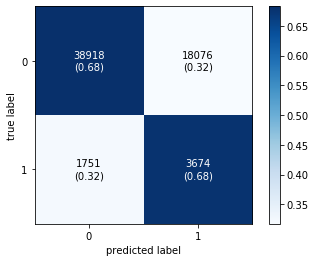

In [71]:
#test with original testing dataset
lgb.fit(X_train_resample, y_train_resample)

y_pred = xgb.predict(X_test.values)

cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

print("Recall metric in the testing dataset: ", cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1]))

class_names = [0,1]
plt.figure()
fig, ax = plot_confusion_matrix(conf_mat=cnf_matrix,
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.savefig('selection_lgb_matrix', dpi=300)
plt.show()


In [72]:
#confusion Matrix
print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.96      0.68      0.80     56994
           1       0.17      0.68      0.27      5425

    accuracy                           0.68     62419
   macro avg       0.56      0.68      0.53     62419
weighted avg       0.89      0.68      0.75     62419



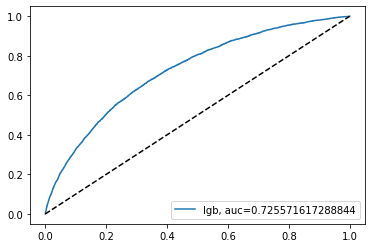

In [73]:
#ROC
y_pred_proba = lgb.predict_proba(X_test.values)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="lgb, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('selection_lgb_roc', dpi=300)
plt.show()

# Model Evaluation

Logistic Regression Stratified K Fold Cross Valuation

In [74]:
pipeline = make_pipeline(rus, log_reg)

auc_roc = []
recall_list = []

kf = StratifiedKFold(n_splits=5,shuffle=False)

dummy = dummy[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                     'DAYS_EMPLOYED','DAYS_REGISTRATION','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
                                     'DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']]

i = 1
lr_auc = 0
for train_index,test_index in kf.split(dummy, target):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = dummy.loc[train_index],dummy.loc[test_index]
    ytr,yvl = target.loc[train_index],target.loc[test_index]
        
    #confustion mmatrix
    y_pred = pipeline.fit(xtr, ytr).predict(xvl)
    print(classification_report(yvl, y_pred)) 
    
    #AUC score
    y_pred_proba = pipeline.fit(xtr, ytr).predict_proba(xvl)[::,1]
    auc = metrics.roc_auc_score(yvl, y_pred_proba)
    print('ROC AUC score:', auc)
    if auc > lr_auc:
        lr_auc = auc
        lr_fpr, lr_tpr, _ = metrics.roc_curve(yvl, y_pred_proba)
    else:
        pass
    auc_roc.append(auc)
    
    #Recall
    recall = recall_score(yvl, y_pred)
    print('Recall score:', recall)
    recall_list.append(recall)
    
    i+=1    

1 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.68      0.80     45595
           1       0.16      0.64      0.26      4340

    accuracy                           0.68     49935
   macro avg       0.56      0.66      0.53     49935
weighted avg       0.88      0.68      0.75     49935

ROC AUC score: 0.7225837126413025
Recall score: 0.6419354838709678
2 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     45595
           1       0.16      0.65      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.66      0.52     49935
weighted avg       0.88      0.67      0.74     49935

ROC AUC score: 0.7223186813575545
Recall score: 0.646774193548387
3 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     45595
           1       0.16      0.65      0.26      4340

    accura

Random Forest Stratified K Fold Cross Valuation

In [75]:
pipeline = make_pipeline(rus, rfc)

auc_roc = []
recall_list = []

kf = StratifiedKFold(n_splits=5,shuffle=False)

dummy = dummy[['AMT_INCOME_TOTAL', 'AMT_CREDIT','AMT_ANNUITY','REGION_POPULATION_RELATIVE','DAYS_BIRTH',
                                     'DAYS_EMPLOYED','DAYS_REGISTRATION','AMT_GOODS_PRICE','HOUR_APPR_PROCESS_START','OBS_30_CNT_SOCIAL_CIRCLE',
                                     'DAYS_ID_PUBLISH','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE','AMT_REQ_CREDIT_BUREAU_YEAR']]

i = 1
rf_auc = 0
for train_index,test_index in kf.split(dummy, target):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = dummy.loc[train_index],dummy.loc[test_index]
    ytr,yvl = target.loc[train_index],target.loc[test_index]
        
    #confustion mmatrix
    y_pred = pipeline.fit(xtr, ytr).predict(xvl)
    print(classification_report(yvl, y_pred)) 
    
    #AUC score
    y_pred_proba = pipeline.fit(xtr, ytr).predict_proba(xvl)[::,1]
    auc = metrics.roc_auc_score(yvl, y_pred_proba)
    print('ROC AUC score:', auc)
    if auc > rf_auc:
        rf_auc = auc
        rf_fpr, rf_tpr, _ = metrics.roc_curve(yvl, y_pred_proba)
    else:
        pass
    auc_roc.append(auc)
    
    #Recall
    recall = recall_score(yvl, y_pred)
    print('Recall score:', recall)
    recall_list.append(recall)
    
    i+=1    

1 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     45595
           1       0.16      0.66      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.67      0.53     49935
weighted avg       0.89      0.67      0.74     49935

ROC AUC score: 0.7243679298249515
Recall score: 0.6599078341013825
2 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.78     45595
           1       0.16      0.67      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.67      0.52     49935
weighted avg       0.89      0.67      0.74     49935

ROC AUC score: 0.7254376768412333
Recall score: 0.6693548387096774
3 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     45595
           1       0.16      0.66      0.26      4340

    accur

Ada Boost Stratified K Fold Cross Valuation

In [76]:
pipeline = make_pipeline(rus, adb)

auc_roc = []
recall_list = []

kf = StratifiedKFold(n_splits=5,shuffle=False)

i = 1
adb_auc = 0
for train_index,test_index in kf.split(dummy, target):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = dummy.loc[train_index],dummy.loc[test_index]
    ytr,yvl = target.loc[train_index],target.loc[test_index]
        
    #confustion mmatrix
    y_pred = pipeline.fit(xtr, ytr).predict(xvl)
    print(classification_report(yvl, y_pred)) 
    
    #AUC score
    y_pred_proba = pipeline.fit(xtr, ytr).predict_proba(xvl)[::,1]
    auc = metrics.roc_auc_score(yvl, y_pred_proba)
    print('ROC AUC score:', auc)
    if auc > adb_auc:
        adb_auc = auc
        adb_fpr, adb_tpr, _ = metrics.roc_curve(yvl, y_pred_proba)
    else:
        pass
    auc_roc.append(auc)
    
    #Recall
    recall = recall_score(yvl, y_pred)
    print('Recall score:', recall)
    recall_list.append(recall)
    
    i+=1    

1 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     45595
           1       0.16      0.66      0.26      4340

    accuracy                           0.68     49935
   macro avg       0.56      0.67      0.53     49935
weighted avg       0.89      0.68      0.75     49935

ROC AUC score: 0.7284544373094513
Recall score: 0.6624423963133641
2 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     45595
           1       0.16      0.66      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.67      0.53     49935
weighted avg       0.89      0.67      0.74     49935

ROC AUC score: 0.7287794512192349
Recall score: 0.6617511520737327
3 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     45595
           1       0.16      0.66      0.26      4340

    accur

XGBoost Stratified K Fold Cross Valuation

In [77]:
pipeline = make_pipeline(rus, xgb)

auc_roc = []
recall_list = []

kf = StratifiedKFold(n_splits=5,shuffle=False)

i = 1
xgb_auc = 0
for train_index,test_index in kf.split(dummy, target):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = dummy.loc[train_index].values,dummy.loc[test_index].values
    ytr,yvl = target.loc[train_index],target.loc[test_index]
        
    #confustion mmatrix
    y_pred = pipeline.fit(xtr, ytr).predict(xvl)
    print(classification_report(yvl, y_pred)) 
    
    #AUC score
    y_pred_proba = pipeline.fit(xtr, ytr).predict_proba(xvl)[::,1]
    auc = metrics.roc_auc_score(yvl, y_pred_proba)
    print('ROC AUC score:', auc)
    if auc > xgb_auc:
        xgb_auc = auc
        xgb_fpr, xgb_tpr, _ = metrics.roc_curve(yvl, y_pred_proba)
    else:
        pass
    auc_roc.append(auc)
    
    #Recall
    recall = recall_score(yvl, y_pred)
    print('Recall score:', recall)
    recall_list.append(recall)
    
    i+=1    

1 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.68      0.79     45595
           1       0.16      0.66      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.67      0.53     49935
weighted avg       0.89      0.67      0.74     49935

ROC AUC score: 0.7323098528771901
Recall score: 0.6599078341013825
2 of KFold 5
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     45595
           1       0.16      0.68      0.26      4340

    accuracy                           0.67     49935
   macro avg       0.56      0.67      0.53     49935
weighted avg       0.89      0.67      0.74     49935

ROC AUC score: 0.7311304624011344
Recall score: 0.6815668202764977
3 of KFold 5
              precision    recall  f1-score   support

           0       0.96      0.67      0.79     45595
           1       0.16      0.67      0.26      4340

    accur

LightGBM Stratified K Fold Cross Valuation

In [78]:
pipeline = make_pipeline(rus, lgb)

auc_roc = []
recall_list = []

kf = StratifiedKFold(n_splits=5,shuffle=False)

i = 1
lgb_auc = 0
for train_index,test_index in kf.split(dummy, target):
    print('{} of KFold {}'.format(i,kf.n_splits))
    xtr,xvl = dummy.loc[train_index].values,dummy.loc[test_index].values
    ytr,yvl = target.loc[train_index],target.loc[test_index]
        
    #confustion mmatrix
    y_pred = pipeline.fit(xtr, ytr).predict(xvl)
    print(classification_report(yvl, y_pred)) 
    
    #AUC score
    y_pred_proba = pipeline.fit(xtr, ytr).predict_proba(xvl)[::,1]
    auc = metrics.roc_auc_score(yvl, y_pred_proba)
    print('ROC AUC score:', auc)
    if auc > lgb_auc:
        lgb_auc = auc
        lgb_fpr, lgb_tpr, _ = metrics.roc_curve(yvl, y_pred_proba)
    else:
        pass
    auc_roc.append(auc)
    
    #Recall
    recall = recall_score(yvl, y_pred)
    print('Recall score:', recall)
    recall_list.append(recall)
    
    i+=1    

1 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.66      0.78     45595
           1       0.15      0.66      0.25      4340

    accuracy                           0.66     49935
   macro avg       0.55      0.66      0.51     49935
weighted avg       0.88      0.66      0.73     49935

ROC AUC score: 0.7166289430636292
Recall score: 0.6566820276497696
2 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.65      0.78     45595
           1       0.15      0.67      0.25      4340

    accuracy                           0.65     49935
   macro avg       0.55      0.66      0.51     49935
weighted avg       0.88      0.65      0.73     49935

ROC AUC score: 0.7182650949579623
Recall score: 0.665668202764977
3 of KFold 5
              precision    recall  f1-score   support

           0       0.95      0.67      0.79     45595
           1       0.16      0.66      0.26      4340

    accura

ROC Comparison among Models

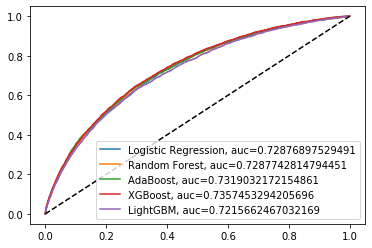

In [79]:
plt.plot(lr_fpr,lr_tpr,label="Logistic Regression, auc="+str(lr_auc))
plt.plot(rf_fpr,rf_tpr,label="Random Forest, auc="+str(rf_auc))
plt.plot(adb_fpr,adb_tpr,label="AdaBoost, auc="+str(adb_auc))
plt.plot(xgb_fpr,xgb_tpr,label="XGBoost, auc="+str(xgb_auc))
plt.plot(lgb_fpr,lgb_tpr,label="LightGBM, auc="+str(lgb_auc))

plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.savefig('all_roc', dpi=300)
plt.show()